In [1]:
from sklearn.preprocessing import minmax_scale


In [2]:
x = [10,4,7,1]
minmax_scale(x)

array([1.        , 0.33333333, 0.66666667, 0.        ])

In [19]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import association_rules
from mlxtend.frequent_patterns import apriori

ds_asso = [['우유','라면',],
          ['라면',],
          ['아이스크림', '우유',],
          ['과자','라면',],
           ['과자','라면',],
           ['아이스크림']]


In [24]:

enc = TransactionEncoder()
arr = enc.fit_transform(X=ds_asso)
ds_pre = pd.DataFrame(arr, columns= enc.columns_)


min_support = 0.001
ds_freq = apriori(ds_pre, min_support = 0.5, use_colnames = True)
print(ds_pre)
print('===========================================')
print(ds_freq)


      과자     라면  아이스크림     우유
0  False   True  False   True
1  False   True  False  False
2  False  False   True   True
3   True   True  False  False
4   True   True  False  False
5  False  False   True  False
    support itemsets
0  0.666667     (라면)


In [7]:
# 기준 = 신뢰도, 최소 신뢰도 = 0.5
ds_asso_rule = association_rules(ds_freq, metric = "confidence", min_threshold=0.01)
ds_asso_rule.round(3)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction


In [25]:
from sklearn.tree import DecisionTreeClassifier

In [36]:
data = pd.read_csv('./csvfiles/IRIS.csv')

In [37]:
data.isnull().sum().sum()

0

In [38]:
data['SPECIES'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [39]:
z = {'setosa' :1, 'versicolor' : 2, 'virginica':3}
data['SPECIES'] = data['SPECIES'].map(z)

In [40]:
from sklearn.model_selection import train_test_split
x = data.drop('SPECIES', axis = 1)
y = data["SPECIES"]

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=1234)

In [41]:
dt_gini = DecisionTreeClassifier(min_samples_leaf=5, min_samples_split=10, criterion='gini')
dt_entropy = DecisionTreeClassifier(min_samples_leaf=5, min_samples_split=10, criterion='entropy')

In [42]:
dt_gini.fit(x_train, y_train)
dt_entropy.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=10,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [66]:
print('gini', dt_gini.score(x_train, y_train))
print('entropy',dt_entropy.score(x_train, y_train))

print('gini', dt_gini.score(x_test, y_test))
print('entropy',dt_entropy.score(x_test, y_test))

gini 0.9619047619047619
entropy 0.9619047619047619
gini 0.9555555555555556
entropy 0.9555555555555556


# 주성분

In [64]:
from sklearn.decomposition import PCA
from scipy import stats
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

In [54]:
pca_data = pd.read_csv('./csvfiles/체질검사.csv')

In [55]:
x = pca_data.drop('FAT', axis = 1)
y = pca_data['FAT']

In [57]:
scaler = StandardScaler()
x_scale = scaler.fit_transform(x)
print("Scaled data :\n {}".format(x[:5].round(3)))
print("Shape :\n {}".format(x_scale.shape))

pca = PCA(n_components=6)

x_pca = pca.fit_transform(x_scale)
print("PCA Data :\n {}".format(x_pca[:5]))
print("Shape :\n {}".format(x_pca.shape))
ds_x_pca = pd.DataFrame(x_pca, columns=["Prin1","Prin2","Prin3","Prin4","Prin5","Prin6",])

##### 고유값 확인


Scaled data :
    AGE  WEIGHT  HEIGHT  NECK  CHEST  ABDOMEN    HIP  THIGH  KNEE  ANKLE  \
0   46  363.15   72.25  51.2  136.2    148.1  147.7   87.3  49.1   29.6   
1   27  168.00   71.25  38.1   93.0     79.1   94.5   57.3  36.2   24.5   
2   69  177.75   68.50  38.7  102.0     95.0   98.3   55.0  38.3   21.8   
3   57  147.75   65.75  35.2   99.6     86.4   90.1   53.0  35.0   21.3   
4   51  219.00   64.00  41.2  119.8    122.1  112.8   62.5  36.9   23.6   

   BICEPS  FOREARM  WRIST  
0    45.0     29.0   21.4  
1    29.0     30.0   18.8  
2    30.8     25.7   18.8  
3    31.7     27.3   16.9  
4    34.7     29.1   18.4  
Shape :
 (252, 13)
PCA Data :
 [[15.14078652  0.74918006  1.73038829  2.97562799 -1.20140416  1.91649244]
 [-1.25745311 -1.79805793 -0.60359147 -0.4059414   1.33324667  0.82223682]
 [-0.72744205  2.31886158 -0.89209681  0.68258035 -0.50328047  0.60020938]
 [-3.21015592  1.46511228  0.45790754 -0.57563715  0.01977212 -0.17880332]
 [ 3.24650172  2.29304235  1.828339

/home/pirl/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/pirl/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [59]:

ds_pca = pd.DataFrame()
# 주성분 분석 모델의 주성분 번호, Eigenvalue, Eigenvalue ratio 등을 데이터 프레임의 형태로 저장
ds_pca["Prin"] = [i for i in range(1,7)]
ds_pca["EigenValues"] = pca.explained_variance_ 
ds_pca["EigenValueRatio"] = pca.explained_variance_ratio_
ds_pca["CumsumEigenValueratio"] = np.cumsum(pca.explained_variance_ratio_)
ds_pca.round(3)

ds_feature = pd.DataFrame({"Feature" : x.columns})


In [68]:
ds_pca

,Prin,EigenValues,EigenValueRatio,CumsumEigenValueratio
0,1,8.072219,0.618476,0.618476
1,2,1.360474,0.104237,0.722712
2,3,1.006311,0.077101,0.799814
3,4,0.670153,0.051346,0.851160
4,5,0.601199,0.046063,0.897222
5,6,0.315004,0.024135,0.921357


In [62]:
temp_col = []
for i in range(len(x.columns)):
    temp_col.append('prin'+str(i+1))
    

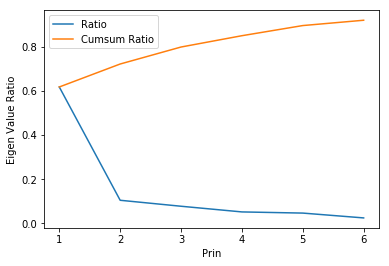

In [65]:
# 주성분 Prin 1~6까지의 고유벡터 저장
ds_eigenvectors = pd.concat([ds_feature,pd.DataFrame(pca.components_, columns=[temp_col])], axis = 1)
ds_eigenvectors

plt.plot(ds_pca["Prin"], ds_pca["EigenValueRatio"], label = "Ratio")
# 누적된 고유값 비율 그래프 생성
plt.plot(ds_pca["Prin"], ds_pca["CumsumEigenValueratio"], label = "Cumsum Ratio")

plt.ylabel("Eigen Value Ratio")
plt.xlabel("Prin")
plt.legend(loc="best")